
# Credit Card Fraud Detection using ML

This project aims to detect fake credit cards by training our machine learning models on a dataset

**Source:** https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

**Features:**
There are Time, transactions expressed in PCA V1,V2,....,V28,Amount and our target Variable, 'Class'

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/creditcard.csv')

**Dataset Description**

In [ ]:
num_of_features = data.shape[1]

print("The number of features in the Dataset is: ",num_of_features)

data_points = len(data)

print(f"The number of data points in our dataset is: ",data_points)


The number of features in the Dataset is:  31
The number of data points in our dataset is:  284807


In [ ]:
feature_counts = data.nunique()

categorical_features = feature_counts[feature_counts <= 10].index
quantitative_features = feature_counts[feature_counts > 10].index

qlc = len(categorical_features)
qnc = len(quantitative_features)

print("Categorical Features: ",qlc)
print(categorical_features)

print("\nQuantitative Features: ",qnc)
print(quantitative_features)

Categorical Features:  1
Index(['Class'], dtype='object')

Quantitative Features:  30
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


In [ ]:
data.shape

(284807, 31)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

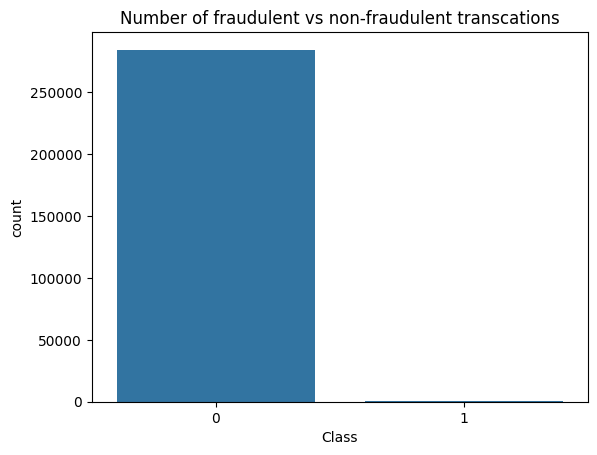

In [ ]:
sns.countplot(x='Class', data=data)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

**Dataset Preprocessing**

In [ ]:
#Checking null values

data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


<Axes: >

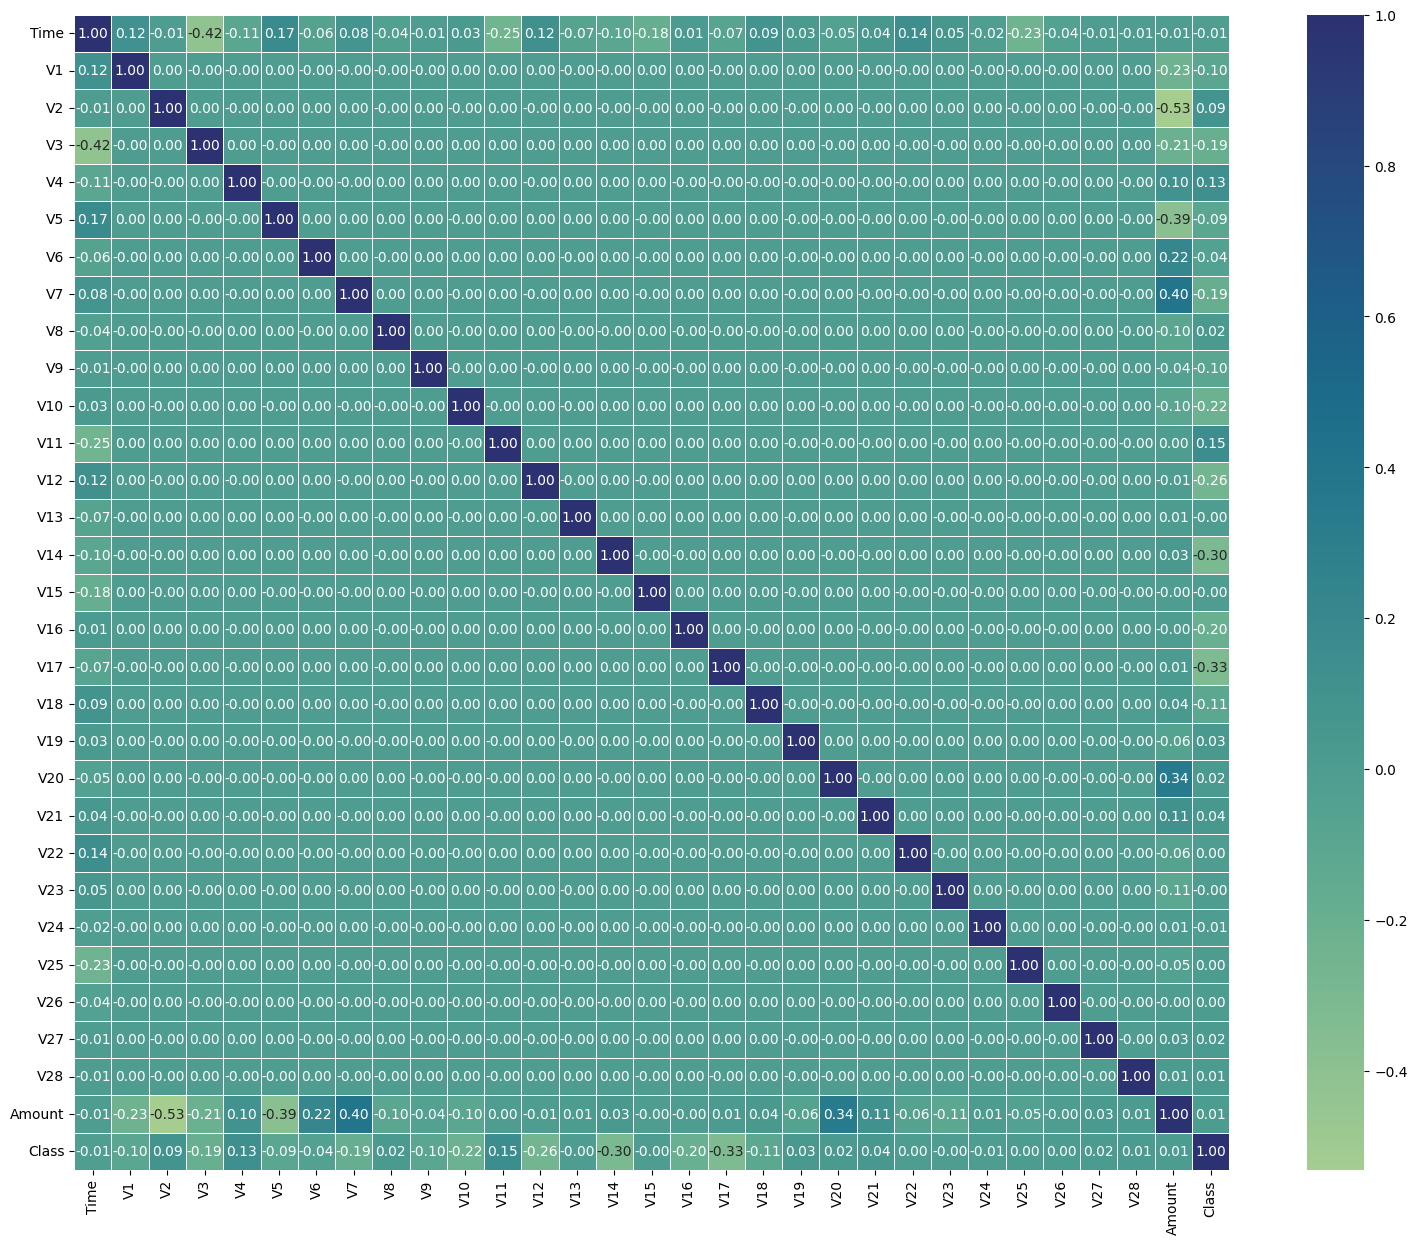

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True, fmt=".2f", linewidth=0.5, cmap="crest", square=True)

In [ ]:
#Checking for duplicates
data.duplicated().any()

True

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(283726, 31)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data['Amount']=scaler.fit_transform(pd.DataFrame(data['Amount']))

<ipython-input-19-d1a9f72b87a9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Amount']=scaler.fit_transform(pd.DataFrame(data['Amount']))


In [ ]:
#dropping time column because it does not affect our target variable

data=data.drop('Time',axis=1)


In [ ]:
data.shape

(283726, 30)

# Oversampling the imbalanced dataset
Due to class imbalance, we are oversampling our dataset

In [ ]:
#splitting features and target
X = data.drop('Class', axis=1)
y = data['Class']

In [ ]:
X.shape

(283726, 29)

In [ ]:
y.shape

(283726,)

In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
X_res,y_res = SMOTE().fit_resample(X,y)


In [ ]:
y_res.value_counts()


Class
0    283253
1    283253
Name: count, dtype: int64

**Dataset Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.30,
                                                 random_state=42)

# Machine Learning Models


**KNN Classifier:**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=101)
knn.fit(X_train, y_train)
y_pred0 = knn.predict(X_test)

In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred0)
conf_matrix_knn = confusion_matrix(y_test, y_pred0)
class_report_knn = classification_report(y_test, y_pred0)

KNN Accuracy: 0.9906
KNN Confusion Matrix:
[[83279  1601]
 [    5 85067]]
KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84880
           1       0.98      1.00      0.99     85072

    accuracy                           0.99    169952
   macro avg       0.99      0.99      0.99    169952
weighted avg       0.99      0.99      0.99    169952



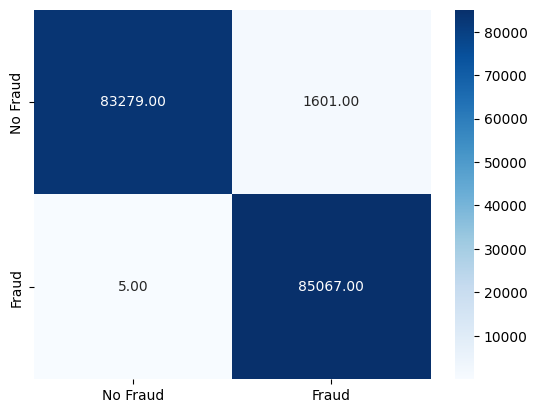

In [ ]:
print(f"KNN Accuracy: {accuracy_knn:.4f}")
print("KNN Confusion Matrix:")
print(conf_matrix_knn)
print("KNN Classification Report:")
print(class_report_knn)

# Plot the confusion matrix for KNN
class_labels = {0: 'No Fraud', 1: 'Fraud'}
y_test_mapped = [class_labels[label] for label in y_test]
y_pred_mapped = [class_labels[label] for label in y_pred0]
sns.heatmap(conf_matrix_knn, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.show()

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred1 = dt.predict(X_test)


In [ ]:
accuracy_score(y_test,y_pred1)


0.998093579363585

In [ ]:
precision_score(y_test,y_pred1)


0.9972073594292687

In [ ]:
f1_score(y_test,y_pred1)


0.9980974303565556

In [ ]:

accuracy = accuracy_score(y_test, y_pred1)
conf_matrix = confusion_matrix(y_test, y_pred1)
class_report = classification_report(y_test, y_pred1)

Accuracy: 0.9981

Confusion Matrix:
[[84642   238]
 [   86 84986]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84880
           1       1.00      1.00      1.00     85072

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952



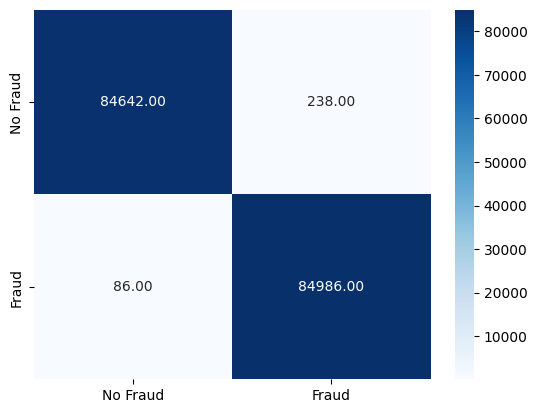

In [ ]:
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
class_labels = {0: 'No Fraud', 1: 'Fraud'}
y_test_mapped = [class_labels[label] for label in y_test]
y_pred_mapped = [class_labels[label] for label in y_pred1]
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.show()

**Logistic Regression**

In [ ]:

from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression(max_iter=2000)
log.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [ ]:
y_pred2 = log.predict(X_test)


In [ ]:
accuracy_score(y_test,y_pred2)


0.9445431651289776

In [ ]:
precision_score(y_test,y_pred2)

0.9723745176156161

In [ ]:

accuracy = accuracy_score(y_test, y_pred2)
conf_matrix = confusion_matrix(y_test, y_pred2)
class_report = classification_report(y_test, y_pred2)

Accuracy: 0.9445

Confusion Matrix:
[[82668  2212]
 [ 7213 77859]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     84880
           1       0.97      0.92      0.94     85072

    accuracy                           0.94    169952
   macro avg       0.95      0.94      0.94    169952
weighted avg       0.95      0.94      0.94    169952



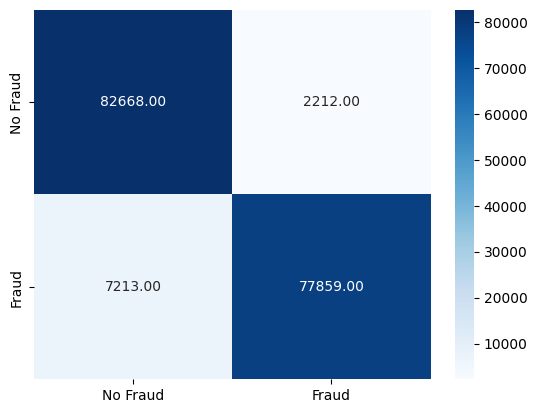

In [ ]:
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
class_labels = {0: 'No Fraud', 1: 'Fraud'}
y_test_mapped = [class_labels[label] for label in y_test]
y_pred_mapped = [class_labels[label] for label in y_pred2]
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.show()

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred3 = rf.predict(X_test)


In [ ]:
accuracy_score(y_test,y_pred3)


0.9998528996422519

In [ ]:
precision_score(y_test,y_pred3)


0.9997062176104916

In [ ]:
recall_score(y_test,y_pred3)


1.0

In [ ]:
f1_score(y_test,y_pred3)


0.9998530872250527

In [ ]:
accuracy = accuracy_score(y_test, y_pred3)
conf_matrix = confusion_matrix(y_test, y_pred3)
class_report = classification_report(y_test, y_pred3)

Accuracy: 0.9999

Confusion Matrix:
[[84855    25]
 [    0 85072]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84880
           1       1.00      1.00      1.00     85072

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952



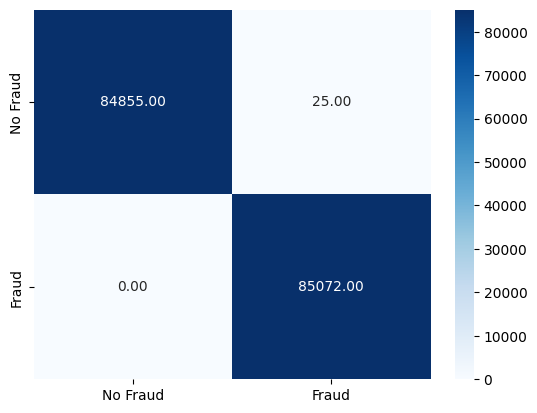

In [ ]:
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
class_labels = {0: 'No Fraud', 1: 'Fraud'}
y_test_mapped = [class_labels[label] for label in y_test]
y_pred_mapped = [class_labels[label] for label in y_pred3]
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.show()

# Models Comparison for Oversampling

In [ ]:
final_data = pd.DataFrame({'Models':['KNN','LR','DT','RF'],
              "ACC":[
                     accuracy_score(y_test,y_pred0)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})


In [ ]:
final_data


,Models,ACC
0,KNN,99.051497
1,LR,94.411363
2,DT,99.816419
3,RF,99.985290


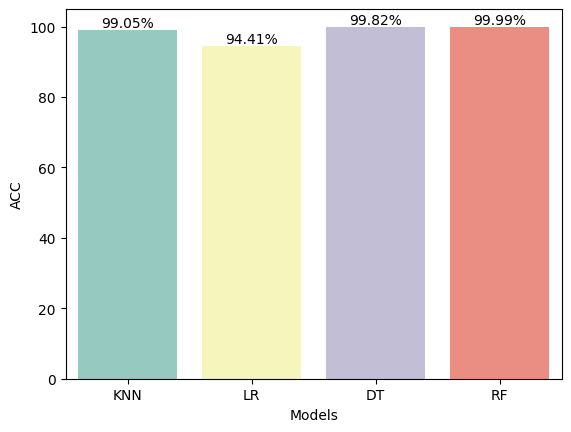

In [ ]:
final_data['ACC_rounded'] = final_data['ACC'].round(2)
ax = sns.barplot(x=final_data['Models'], y=final_data['ACC'], palette="Set3",hue=final_data['Models'])


for index, value in enumerate(final_data['ACC_rounded']):
    ax.text(index, value, str(value)+'%', ha='center', va='bottom')


plt.show()

In [ ]:
comparison = pd.DataFrame({'Models':['KNN','LR','DT','RF'],
              "Precision":[
                     precision_score(y_test,y_pred0)*100,
                     precision_score(y_test,y_pred2)*100,
                     precision_score(y_test,y_pred1)*100,
                     precision_score(y_test,y_pred3)*100
                    ],
              "Recall":[
                     recall_score(y_test,y_pred0)*100,
                     recall_score(y_test,y_pred2)*100,
                     recall_score(y_test,y_pred1)*100,
                     recall_score(y_test,y_pred3)*100
                    ]})

In [ ]:
comparison

,Models,Precision,Recall
0,KNN,98.144815,99.995298
1,LR,97.250288,91.420209
2,DT,99.732445,99.901260
3,RF,99.970622,100.000000


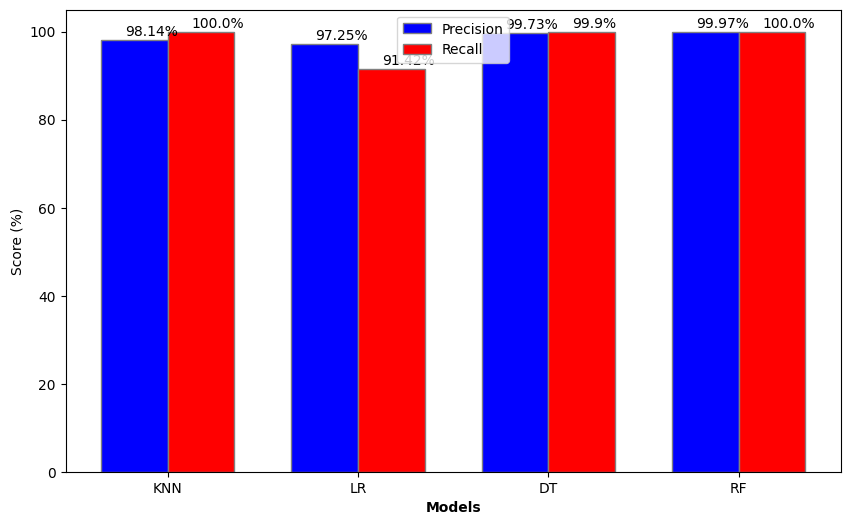

In [ ]:
comparison['prec_rounded'] = comparison['Precision'].round(2)
comparison['recall_rounded'] = comparison['Recall'].round(2)

plt.figure(figsize=(10,6))
barWidth = 0.35

r1 = range(len(comparison['Models']))
r2 = [x + barWidth for x in r1]

plt.bar(r1, comparison['Precision'], color='blue', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r2, comparison['Recall'], color='red', width=barWidth, edgecolor='grey', label='Recall')


plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(comparison['Models']))], comparison['Models'])
plt.ylabel('Score (%)')
plt.legend()


for i in range(len(comparison['Models'])):
    plt.text(x = r1[i] - 0.05, y = comparison['Precision'][i]+1, s = str(comparison['prec_rounded'][i])+'%', size = 10)
    plt.text(x = r2[i] - 0.05, y = comparison['Recall'][i]+1, s = str(comparison['recall_rounded'][i])+'%', size = 10)

plt.show()

# Undersampling The Imbalanced Dataset

Due to class imbalance, we are undersampling the dataset to make them equal

In [ ]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [ ]:
normal.shape


(283253, 30)

In [ ]:
normal_sample=normal.sample(n=473)


In [ ]:
normal_sample.shape


(473, 30)

In [ ]:
X_res,y_res = SMOTE().fit_resample(X,y)


In [ ]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)


In [ ]:
new_data['Class'].value_counts()


Class
0    473
1    473
Name: count, dtype: int64

In [ ]:
new_data.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.213184,0.310088,0.279052,0.643043,-0.179900,-0.601639,0.012750,-0.068387,0.020334,-0.328431,...,-0.259344,-0.710981,0.158184,0.035449,0.145170,0.123932,-0.006226,0.027531,-0.346178,0
1,-0.710970,1.817970,-0.699053,0.634861,2.441563,-0.503670,1.273047,-0.061140,-1.145171,-2.151722,...,-0.198630,-0.546969,-0.624499,-1.646705,0.898170,-0.146385,0.088156,0.132992,-0.347137,0
2,1.210299,-0.071791,0.931545,1.150811,-0.599153,0.266463,-0.592026,0.156156,0.984605,-0.193831,...,-0.119711,-0.146077,-0.106181,-0.463695,0.518301,-0.355931,0.069819,0.029318,-0.313431,0
3,2.071946,-2.201695,0.846558,-0.935197,-2.736618,0.405937,-2.421884,0.275807,0.578043,1.153783,...,-0.045604,0.738232,0.166303,0.086607,-0.367563,0.016153,0.112976,-0.020203,-0.134077,0
4,1.214433,-1.088091,-0.958167,-3.037317,1.071302,3.180811,-1.124556,0.882711,2.325959,-1.596101,...,0.133139,0.417513,-0.252333,1.063052,0.818326,-0.631861,0.096115,0.036162,-0.078885,0


In [ ]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [ ]:
new_data.shape

(946, 30)

**Splitting the Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,
                                                 random_state=42)

# Machine Learning Models

**KNN Classifier**

In [ ]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred4 = knn.predict(X_test)



In [ ]:
# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred4)
conf_matrix_knn = confusion_matrix(y_test, y_pred4)
class_report_knn = classification_report(y_test, y_pred4)



KNN Accuracy: 0.9542

KNN Confusion Matrix:
[[139   1]
 [ 12 132]]

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       140
           1       0.99      0.92      0.95       144

    accuracy                           0.95       284
   macro avg       0.96      0.95      0.95       284
weighted avg       0.96      0.95      0.95       284



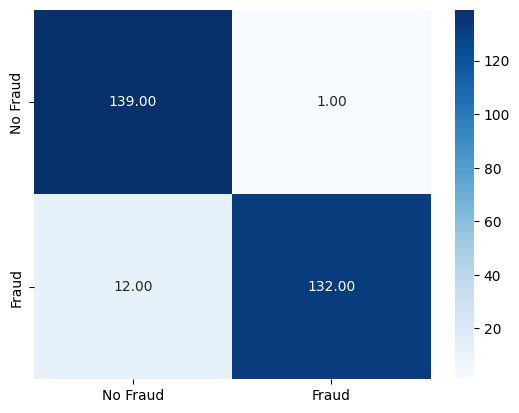

In [ ]:
# Print the results for KNN
print(f"KNN Accuracy: {accuracy_knn:.4f}")
print("\nKNN Confusion Matrix:")
print(conf_matrix_knn)
print("\nKNN Classification Report:")
print(class_report_knn)

# Plot the confusion matrix for KNN
class_labels = {0: 'No Fraud', 1: 'Fraud'}
y_test_mapped = [class_labels[label] for label in y_test]
y_pred_mapped = [class_labels[label] for label in y_pred4]
sns.heatmap(conf_matrix_knn, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.show()

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred5 = dt.predict(X_test)


In [ ]:
accuracy_score(y_test,y_pred5)


0.9225352112676056

In [ ]:
precision_score(y_test,y_pred5)


0.9357142857142857

In [ ]:
f1_score(y_test,y_pred5)


0.9225352112676057

In [ ]:
accuracy = accuracy_score(y_test, y_pred5)
conf_matrix = confusion_matrix(y_test, y_pred5)
class_report = classification_report(y_test, y_pred5)

Accuracy: 0.9225

Confusion Matrix:
[[131   9]
 [ 13 131]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       140
           1       0.94      0.91      0.92       144

    accuracy                           0.92       284
   macro avg       0.92      0.92      0.92       284
weighted avg       0.92      0.92      0.92       284



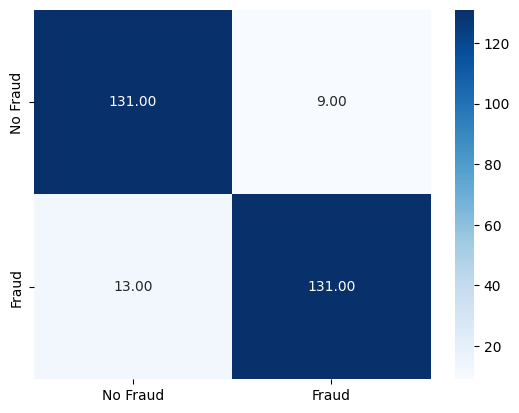

In [ ]:
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
class_labels = {0: 'No Fraud', 1: 'Fraud'}
y_test_mapped = [class_labels[label] for label in y_test]
y_pred_mapped = [class_labels[label] for label in y_pred5]
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.show()

**Logistic Regression**

In [ ]:

from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression(max_iter=2000)
log.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [ ]:
y_pred6 = log.predict(X_test)


In [ ]:
accuracy_score(y_test,y_pred6)


0.954225352112676

In [ ]:

accuracy = accuracy_score(y_test, y_pred6)
conf_matrix = confusion_matrix(y_test, y_pred6)
class_report = classification_report(y_test, y_pred6)

Accuracy: 0.9542

Confusion Matrix:
[[138   2]
 [ 11 133]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       140
           1       0.99      0.92      0.95       144

    accuracy                           0.95       284
   macro avg       0.96      0.95      0.95       284
weighted avg       0.96      0.95      0.95       284



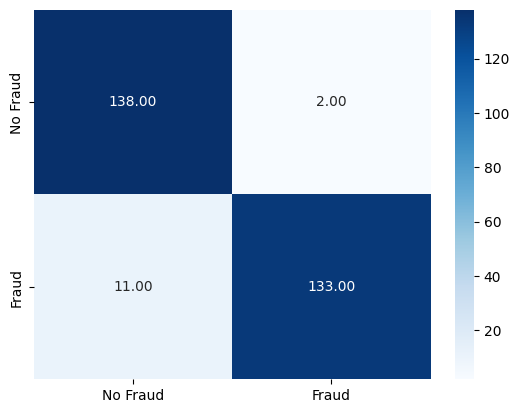

In [ ]:
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
class_labels = {0: 'No Fraud', 1: 'Fraud'}
y_test_mapped = [class_labels[label] for label in y_test]
y_pred_mapped = [class_labels[label] for label in y_pred6]
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.show()

In [ ]:
precision_score(y_test,y_pred6)


0.9851851851851852

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred7 = rf.predict(X_test)


In [ ]:
accuracy_score(y_test,y_pred7)


0.9577464788732394

In [ ]:
precision_score(y_test,y_pred7)


0.9925373134328358

In [ ]:
recall_score(y_test,y_pred7)


0.9236111111111112

In [ ]:
f1_score(y_test,y_pred7)


0.9568345323741008

In [ ]:
accuracy = accuracy_score(y_test, y_pred7)
conf_matrix = confusion_matrix(y_test, y_pred7)
class_report = classification_report(y_test, y_pred7)

Accuracy: 0.9577

Confusion Matrix:
[[139   1]
 [ 11 133]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       140
           1       0.99      0.92      0.96       144

    accuracy                           0.96       284
   macro avg       0.96      0.96      0.96       284
weighted avg       0.96      0.96      0.96       284



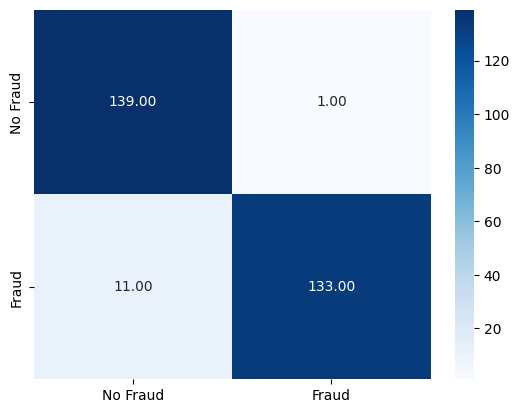

In [ ]:
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
class_labels = {0: 'No Fraud', 1: 'Fraud'}
y_test_mapped = [class_labels[label] for label in y_test]
y_pred_mapped = [class_labels[label] for label in y_pred7]
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.show()

# Models Comparison for Undersampling

In [ ]:
final_data_2 = pd.DataFrame({'Models':['KNN','LR','DT','RF'],
              "ACC":[
                     accuracy_score(y_test,y_pred4)*100,
                     accuracy_score(y_test,y_pred6)*100,
                     accuracy_score(y_test,y_pred5)*100,
                     accuracy_score(y_test,y_pred7)*100
                    ]})


In [ ]:
final_data_2


,Models,ACC
0,KNN,95.422535
1,LR,95.422535
2,DT,92.253521
3,RF,95.774648


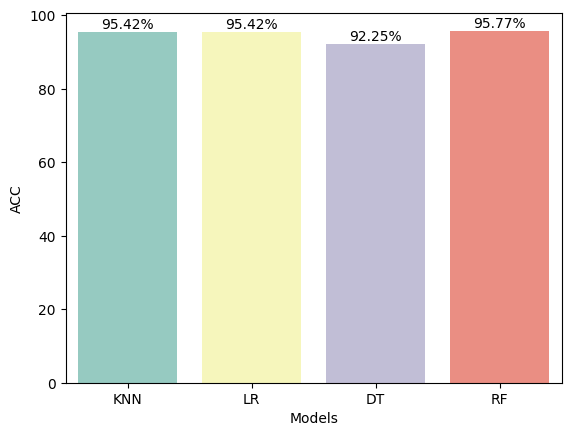

In [ ]:
final_data_2['ACC_rounded'] = final_data_2['ACC'].round(2)
ax = sns.barplot(x=final_data_2['Models'], y=final_data_2['ACC'], palette="Set3",hue=final_data_2['Models'])


for index, value in enumerate(final_data_2['ACC_rounded']):
    ax.text(index, value, str(value)+'%', ha='center', va='bottom')


plt.show()

In [ ]:
comparison_2 = pd.DataFrame({'Models':['KNN','LR','DT','RF'],
              "Precision":[
                     precision_score(y_test,y_pred4)*100,
                     precision_score(y_test,y_pred6)*100,
                     precision_score(y_test,y_pred5)*100,
                     precision_score(y_test,y_pred7)*100
                    ],
              "Recall":[
                     recall_score(y_test,y_pred4)*100,
                     recall_score(y_test,y_pred6)*100,
                     recall_score(y_test,y_pred5)*100,
                     recall_score(y_test,y_pred7)*100
                    ]})

In [ ]:
comparison_2

,Models,Precision,Recall
0,KNN,99.248120,91.666667
1,LR,98.518519,92.361111
2,DT,93.571429,90.972222
3,RF,99.253731,92.361111


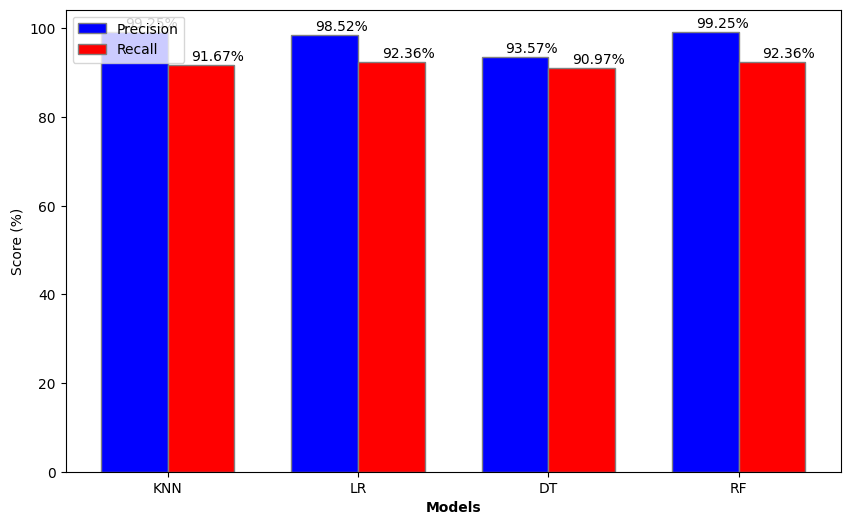

In [ ]:
comparison_2['prec_rounded'] = comparison_2['Precision'].round(2)
comparison_2['recall_rounded'] = comparison_2['Recall'].round(2)

plt.figure(figsize=(10,6))
barWidth = 0.35

r1 = range(len(comparison_2['Models']))
r2 = [x + barWidth for x in r1]

plt.bar(r1, comparison_2['Precision'], color='blue', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r2, comparison_2['Recall'], color='red', width=barWidth, edgecolor='grey', label='Recall')


plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(comparison_2['Models']))], comparison_2['Models'])
plt.ylabel('Score (%)')
plt.legend()


for i in range(len(comparison_2['Models'])):
    plt.text(x = r1[i] - 0.05, y = comparison_2['Precision'][i]+1, s = str(comparison_2['prec_rounded'][i])+'%', size = 10)
    plt.text(x = r2[i] - 0.05, y = comparison_2['Recall'][i]+1, s = str(comparison_2['recall_rounded'][i])+'%', size = 10)

plt.show()